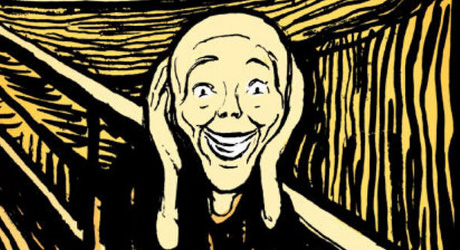

# World Happiness Report 


Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

These data are kept from 2015 to 2019.

# What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. 
The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


# What are the residuals?

The residuals, or unexplained components, have an average value of approximately zero over the whole set of countries. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. 

# MEANING OF TERMS
* **GDP per capita:** GDP per capita is a measure of a country's economic output that accounts for its number of people.
* **Social support:** Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.
* **Healthy life expectancy:** Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health" in other words, not hampered by disabling illnesses or injuries.
* **Freedom:** Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
* **Generosity:** The quality of being kind and generous.
* **Perceptions of corruption:** The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

**Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import random
import seaborn as sbr

**Import Datasets**

In [ ]:
d15 = pd.read_csv('../input/world-happiness/2015.csv')
d16 = pd.read_csv('../input/world-happiness/2016.csv')
d17 = pd.read_csv('../input/world-happiness/2017.csv')
d18 = pd.read_csv('../input/world-happiness/2018.csv')
d19 = pd.read_csv('../input/world-happiness/2019.csv')

**2015 Year Overview**

In [ ]:
print(d15.info())
print('-' * 100)
print(d15.describe())

**2016 Year Overview**

In [ ]:
print(d16.info())
print('-' * 100)
print(d16.describe())

**2017 Year Overview**

In [ ]:
print(d17.info())
print('-' * 100)
print(d17.describe())

**2018 Year Overview**

In [ ]:
print(d18.info())
print('-' * 100)
print(d18.describe())

**2019 Year Overview**

In [ ]:
print(d19.info())
print('-' * 100)
print(d19.describe())

**Delete some columns to get 5 years of common data for the five data sets contain the same data**

In [ ]:
d15.drop(columns="Standard Error",inplace=True,errors="ignore")
d15.drop(columns="Dystopia Residual",inplace=True,errors="ignore")
d15.drop(columns="Region",inplace=True,errors="ignore")

In [ ]:
d16.drop(columns="Lower Confidence Interval",inplace=True,errors="ignore")
d16.drop(columns="Upper Confidence Interval",inplace=True,errors="ignore")
d16.drop(columns="Dystopia Residual",inplace=True,errors="ignore")
d16.drop(columns="Region",inplace=True,errors="ignore")

In [ ]:
del d17["Whisker.high"]
del d17["Whisker.low"]
d17.drop(columns="Dystopia.Residual",inplace=True,errors="ignore")

# Change columns name for be to same in all data

In [ ]:
d15=d15.rename(columns={"Happiness Rank":"Overall rank",
                            "Country" : "Country or region",
                            "Happiness Score":"Score",
                            "Economy (GDP per Capita)":"GDP per capita",
                            "Family" : "Social support",
                            "Health (Life Expectancy)":"Healthy life expectancy",
                            "Trust (Government Corruption)":"Perceptions of corruption"})

In [ ]:
d16=d16.rename(columns={"Country" : "Country or region",
                           "Happiness Rank":"Overall rank",
                            "Happiness Score":"Score",
                            "Economy (GDP per Capita)":"GDP per capita",
                            "Family" : "Social support",
                            "Health (Life Expectancy)":"Healthy life expectancy",
                            "Trust (Government Corruption)":"Perceptions of corruption"})

In [ ]:
d17=d17.rename(columns={"Country" : "Country or region",
                           "Happiness.Rank":"Overall rank",
                            "Happiness.Score":"Score",
                            "Economy..GDP.per.Capita.":"GDP per capita",
                            "Family" : "Social support",
                            "Health..Life.Expectancy.":"Healthy life expectancy",
                            "Trust..Government.Corruption.":"Perceptions of corruption"})

In [ ]:
d18=d18.rename(columns={"Freedom to make life choices" : "Freedom"})

In [ ]:
d19=d19.rename(columns={"Freedom to make life choices" : "Freedom"})

**Match all columns by name**

In [ ]:
d15 = d15.reindex(columns= d16.columns)
#we arranged it according to d16
d17 = d17.reindex(columns= d16.columns)
d18 = d18.reindex(columns= d16.columns)
d19 = d19.reindex(columns= d16.columns)

**Now take a look at the five years data**

In [ ]:
d15.head()

In [ ]:
d16.head()

In [ ]:
d17.head()

In [ ]:
d18.head()

In [ ]:
d19.head()

**To get an idea of how the economy affects the happiness score, we can look at some country charts over a five-year period**

In [ ]:
d18['Year']='2018'
d19['Year']='2019'
d15['Year']='2015'
d16['Year']='2016'
d17['Year']='2017'

data1=d15.filter(['Country or region','GDP per capita',"Year"],axis=1)
data2=d16.filter(['Country or region','GDP per capita',"Year"],axis=1)
data3=d17.filter(['Country or region','GDP per capita','Year'],axis=1)
data4=d18.filter(['Country or region','GDP per capita',"Year"],axis=1)
data5=d19.filter(['Country or region','GDP per capita','Year'],axis=1)
data1=data1.append([data2,data3,data4,data5])

plt.figure(figsize=(10,8))
d = data1[data1['Country or region']=='India']
sns.lineplot(x="Year", y="GDP per capita",data=d,label='Venezuela')
d = data1[data1['Country or region']=='United States']
sns.lineplot(x="Year", y="GDP per capita",data=d,label='Norway')
d = data1[data1['Country or region']=='Finland']
sns.lineplot(x="Year", y="GDP per capita",data=d,label='Finland')
d = data1[data1['Country or region']=='United Kingdom']
sns.lineplot(x="Year", y="GDP per capita",data=d,label="Colombia")
d = data1[data1['Country or region']=='Canada']
sns.lineplot(x="Year", y="GDP per capita",data=d,label='Turkey')


plt.title("GDP per capita 2015-2019")

**It is clear from the graph results that the Norway has the highest GDP per capita ratios. Norway is followed by Turkey, Venezuela at the bottom, and Finland and Colombia have almost the same odds.**

**The scores of these countries are as follows (from 2015 to 1029) :**
* Norway : 4 - 4 - 1 - 2 - 3
* Turkey : 76 - 78 - 69 - 74 - 79
* Finland : 6 - 5 - 5 - 1 - 1
* Colombia : 33 - 31 - 36 - 37 - 43
* Venezuela : 23 - 44 - 82 - 102 - 108

**Although norway has the strongest odds for GDP per capita, Finland has managed to beat norway in some years on the score list with other factors.**

# 3D Scatter Plot between economi, health and social support


In [ ]:
init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=d19["GDP per capita"],
    y=d19["Healthy life expectancy"],
    z=d19["Social support"],
    mode='markers',
    name = "2019",
    marker=dict(
        color='rgb(240,128,128)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )))
trace2 = go.Scatter3d(
    x=d18["GDP per capita"],
    y=d18["Healthy life expectancy"],
    z=d18["Social support"],
    mode='markers',
    name = "2018",
    marker=dict(
        color='rgb(0 ,128, 128)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )))
trace3 = go.Scatter3d(
    x=d17["GDP per capita"],
    y=d17["Healthy life expectancy"],
    z=d17["Social support"],
    mode='markers',
    name = "2017",
    marker=dict(
        color='rgb(202 ,255, 112)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )))
trace4 = go.Scatter3d(
    x=d16["GDP per capita"],
    y=d16["Healthy life expectancy"],
    z=d16["Social support"],
    mode='markers',
    name = "2016",
    marker=dict(
        color='rgb(131,111 ,255)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )))

trace5 = go.Scatter3d(
    x=d15["GDP per capita"],
    y=d15["Healthy life expectancy"],
    z=d15["Social support"],
    mode='markers',
    name = "2015",
    marker=dict(
        color='rgb(126, 192 ,238)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )))


data = [trace1, trace2, trace3,trace4,trace5]
layout = go.Layout(
    title = '2015,2016,2017,2018 and 2019 values',
    scene = dict(xaxis = dict(title='GDP per capita'),
                yaxis = dict(title='Healthy life expectancy'),
                zaxis = dict(title=' Social support'),),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ))
fig = go.Figure(data=data, layout=layout)
iplot(fig)



**This graph shows us that as GDP per capita increases, social support increases and as social support increases healthy life expectancy increases.**

**In 2018, when social support had the best rate, healthy life expectancy had an average rate of 0.605, while GDP per capita was 0.719.**

**When the economy is at its good, the factors of social support and healthy life expectancy are above average.**

**Let's look at the status of happiness score by years**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=d19.Score, name='2019'))
fig.add_trace(go.Box(x=d18.Score, name='2018'))
fig.add_trace(go.Box(x=d17.Score, name='2017'))
fig.add_trace(go.Box(x=d16.Score, name='2016'))
fig.add_trace(go.Box(x=d15.Score, name='2015'))
fig.show()

# Create a new data which includes sum of five years data

In [ ]:
d_all = pd.concat([d15,d16,d17,d18,d19])
d_all

In [ ]:
d_all.info()

**Let's check several countries**

In [ ]:
d_all.loc[d_all['Country or region']=='Canada']

In [ ]:
d_all.loc[d_all['Country or region']=='Kenya']

In [ ]:
d_all.loc[d_all['Country or region']=='Suriname']

In [ ]:
d_all.loc[d_all['Country or region']=='Swaziland']

**We can see that data for some countries are not available in every year. Different countries should be deleted to equalize five-year data.**

# Delete countries

**Delete countries that differ from other data in 2015 data**

In [ ]:
d15.drop(d15.index[147],inplace=True)
d15.drop(d15.index[139],inplace=True)
d15.drop(d15.index[136],inplace=True)
d15.drop(d15.index[125],inplace=True)
d15.drop(d15.index[117],inplace=True)
d15.drop(d15.index[100],inplace=True)
d15.drop(d15.index[98],inplace=True)
d15.drop(d15.index[96],inplace=True)
d15.drop(d15.index[93],inplace=True)
d15.drop(d15.index[92],inplace=True)
d15.drop(d15.index[90],inplace=True)
d15.drop(d15.index[39],inplace=True)
d15.drop(d15.index[21],inplace=True)

**Delete countries that differ from other data in 2016 data**

In [ ]:
d16.drop(d16.index[142],inplace=True)
d16.drop(d16.index[140],inplace=True)
d16.drop(d16.index[137],inplace=True)
d16.drop(d16.index[132],inplace=True)
d16.drop(d16.index[112],inplace=True)
d16.drop(d16.index[101],inplace=True)
d16.drop(d16.index[96],inplace=True)
d16.drop(d16.index[94],inplace=True)
d16.drop(d16.index[75],inplace=True)
d16.drop(d16.index[51],inplace=True)
d16.drop(d16.index[39],inplace=True)
d16.drop(d16.index[14],inplace=True)


**Delete countries that differ from other data in 2017 data**

In [ ]:
d17.drop(d17.index[154],inplace=True)
d17.drop(d17.index[146],inplace=True)
d17.drop(d17.index[139],inplace=True)
d17.drop(d17.index[138],inplace=True)
d17.drop(d17.index[129],inplace=True)
d17.drop(d17.index[112],inplace=True)
d17.drop(d17.index[110],inplace=True)
d17.drop(d17.index[92],inplace=True)
d17.drop(d17.index[91],inplace=True)
d17.drop(d17.index[49],inplace=True)


**Delete countries that differ from other data in 2018 data**

In [ ]:
d18.drop(d18.index[154],inplace=True)
d18.drop(d18.index[153],inplace=True)
d18.drop(d18.index[141],inplace=True)
d18.drop(d18.index[140],inplace=True)
d18.drop(d18.index[136],inplace=True)
d18.drop(d18.index[122],inplace=True)
d18.drop(d18.index[118],inplace=True)
d18.drop(d18.index[109],inplace=True)
d18.drop(d18.index[97],inplace=True)
d18.drop(d18.index[88],inplace=True)
d18.drop(d18.index[48],inplace=True)

**Delete countries that differ from other data in 2019 data**

In [ ]:
d19.drop(d19.index[155],inplace=True)
d19.drop(d19.index[154],inplace=True)
d19.drop(d19.index[143],inplace=True)
d19.drop(d19.index[141],inplace=True)
d19.drop(d19.index[134],inplace=True)
d19.drop(d19.index[122],inplace=True)
d19.drop(d19.index[119],inplace=True)
d19.drop(d19.index[112],inplace=True)
d19.drop(d19.index[111],inplace=True)
d19.drop(d19.index[104],inplace=True)
d19.drop(d19.index[83],inplace=True)

# Create new data that includes common parts of five years of data

In [ ]:
d2015=d15.sort_values(by="Country or region").copy()
d2016=d16.sort_values(by="Country or region").copy()
d2017=d17.sort_values(by="Country or region").copy()
d2018=d18.sort_values(by="Country or region").copy()
d2019=d19.sort_values(by="Country or region").copy()

In [ ]:
d2015.index=range(len(d2015))
d2016.index=range(len(d2016))
d2017.index=range(len(d2017))
d2018.index=range(len(d2018))
d2019.index=range(len(d2019))

In [ ]:
d_total = pd.DataFrame()
d_total["Country or region"] = d2019["Country or region"]
d_total["Overall rank"] = d2019["Overall rank"]
d_total["Score"] = (d2019["Score"]+d2018["Score"]+d2017["Score"]+d2016["Score"]+d2015["Score"])/5
d_total["GDP per capita"] = (d2019["GDP per capita"]+d2018["GDP per capita"]+d2017["GDP per capita"]+d2016["GDP per capita"]+d2015["GDP per capita"])/5
d_total["Social support"] = (d2019["Social support"]+d2018["Social support"]+d2017["Social support"]+d2016["Social support"]+d2015["Social support"])/5
d_total["Healthy life expectancy"] = (d2019["Healthy life expectancy"]+d2018["Healthy life expectancy"]+d2017["Healthy life expectancy"]+d2016["Healthy life expectancy"]+d2015["Healthy life expectancy"])/5
d_total["Freedom"] =  (d2019["Freedom"]+d2018["Freedom"]+d2017["Freedom"]+d2016["Freedom"]+d2015["Freedom"])/5
d_total["Perceptions of corruption"] =  (d2019["Perceptions of corruption"]+d2018["Perceptions of corruption"]+d2017["Perceptions of corruption"]+d2016["Perceptions of corruption"]+d2015["Perceptions of corruption"])/5
d_total["Generosity"] =  (d2019["Generosity"]+d2018["Generosity"]+d2017["Generosity"]+d2016["Generosity"]+d2015["Generosity"])/5


**Sort countries according to their scores to improve overall ranking**

In [ ]:
d_total = d_total.sort_values(['Score'],ascending = False)
d_total["Overall rank"] = d_total.reset_index().index
d_total.drop(["Overall rank"],axis = 1)

In [ ]:
d_total.info()

In [ ]:
d_total.describe()

**Let's examine the total data**

In [ ]:
generated_color_list = []

for i in range(len(d_total.columns) - 2):

    generated_color_list.append("%06x" % random.randint(0, 0xFFFFFF))

d_total.style \
.bar(subset = d_total.columns[2], color= '#'+ generated_color_list[0]) \
.bar(subset = d_total.columns[3], color= '#'+ generated_color_list[1]) \
.bar(subset = d_total.columns[4], color= '#'+ generated_color_list[2]) \
.bar(subset = d_total.columns[5], color= '#'+ generated_color_list[3]) \
.bar(subset = d_total.columns[6], color= '#'+ generated_color_list[4]) \
.bar(subset = d_total.columns[7], color= '#'+ generated_color_list[5]) \
.bar(subset = d_total.columns[8], color= '#'+ generated_color_list[6])



**Highlighting the maixmum values of each attribute in the data set**

In [ ]:
d_total.head()
original=d_total.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
d_total.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom','Generosity','Perceptions of corruption'])

**Iceland ranks 4th despite having the best score in social support and Qatar ranks 30th despite having the best score in the economy whereas Finland ranks 1st despite not having the best result in any factor.**

**Looking at these results, we can say that none of the six factors alone is sufficient on happiness.**

# Geographical Visualization of Happiness Score

**On this map, you can see the average happiness scores of countries based on five-year data.**

In [ ]:
data = dict(type = 'choropleth', 
           locations= d_total['Country or region'],
           locationmode = 'country names',
           colorscale ='RdYlGn',
           z = d_total['Score'], 
           text = d_total['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

**Correlation Map**

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sbr.heatmap(d_total.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

**The three factors that most affect the happiness score; GDP per capita, Social support and Healthy life expectancy.**

**If we look at the scoring of 0.5 between "Perceptions of corruption" and "Freedom" in the correlation map, we can say that the higher the freedom rate in the country, the higher the trust in the country. In addition to this the "Generosity" factor increases in the same direction.But interestingly, there is only 0.1 point between "Generosity" and "social support".**

**It is also clear that economy is an important factor for a country to improve healthy life expectancy.**
